# This notebook will explore the airbnb data from Mex. City


 Importing the necessary packages and loading the datasets

## Importing the neccesarry packages and loading the datasets

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandasql as ps
from scipy import stats
import datetime

In [165]:
calendar_df = pd.read_csv('../raw_data/mexico/calendar.csv')
list_df = pd.read_csv('../raw_data/mexico/listings.csv')
rev_df = pd.read_csv('../raw_data/mexico/reviews.csv')
neigh_df = pd.read_csv('../raw_data/mexico/neighbourhoods.csv')

### Displaying the first three rows of every dataframe(df) in order to know the tables

In [166]:
list_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,NaN,NaN,1,363,0,NaN
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,0.41,10,344,1,NaN
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,66,2021-11-21,0.50,2,364,10,NaN


In [167]:
calendar_df.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2084093,2021-12-26,f,$453.00,$453.00,1.0,1125.0
1,35797,2021-12-26,f,"$4,123.00","$4,123.00",1.0,7.0
2,35797,2021-12-27,f,"$4,123.00","$4,123.00",1.0,7.0


In [168]:
rev_df.head()

,listing_id,date
0,44616,2011-11-09
1,44616,2012-08-16
2,44616,2012-12-28
3,44616,2013-01-04
4,44616,2013-03-19


In [172]:
neigh_df.shape

(16, 2)

we observe that the listings table has it's own information as well as some processed information from the reviews and calendar tables. At the same time, the reviews table has the date of each individual review per id.

In [173]:
 #rev_df.groupby(by=['listing_id']).count().sort_values(by='date')

In [174]:
#checking the data types

list_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

## Listing table cleaning
we can see there are some columns with null values, so i will se how much of that is usefull so we have a dataset prepared for some modelling.

Before doing any modifications, let's whats the shape of the table.

In [175]:
list_df.shape

(19655, 18)

Lets see if there is any duplicated row and eventually remove it.

In [176]:
list_df.duplicated().sum()
#No duplicates

0

In [177]:
print((list_df.isnull().sum()/len(list_df)*100).sort_values(ascending=False))

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  20.234037
last_review                        20.234037
name                                0.015263
host_name                           0.005088
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64


**MISSING DATA!!**

summing all the Null ocurrences per column and dividing it by the length of the columns we can have the percentage of null values per column. It is a good practice to get rid off any column with more than 30-35% of null values (if they are not specified to mean something). So, i will drop the 'license' and 'neighbourhood_group' columns.

For the rest of the columns, i will input them values or replace the null value for some place holder.

### Dropping and imputing missing values

I will use the simple imputer module from scikit learn to impute the values

In [178]:
#dropping columns and saving the changes into the same table
list_df.drop(columns=['license', 'neighbourhood_group'], inplace=True)

In [179]:
#replacing null values in name and host_name columns to 'no_name' value.
list_df['name'].replace(np.nan, 'no_name', inplace=True)
list_df['host_name'].replace(np.nan, 'no_name', inplace=True)

In [180]:
#inputing values for last_review and reviews_per_month. In this case, we will input the most common date for last_review and input and average for reviews_per_month for all null values.


freq_imp = SimpleImputer(strategy='most_frequent')

#fitting and transforming the data, replacing null values with the most frequent last review date

list_df['last_review'] = freq_imp.fit_transform(list_df.filter(items=['last_review']))


In [181]:
mean_imp = SimpleImputer(strategy='mean')

#fitting and transforming the data, replacing the null values with the mean value of reviews per month

list_df['reviews_per_month'] = mean_imp.fit_transform(list_df.filter(items=['reviews_per_month']))

We can see now that the missing values are gone, every null value has been removed or replaced with an imputation

In [182]:
print((list_df.isnull().sum()/len(list_df)*100).sort_values(ascending=False))

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64


### Looking for outliers
I will see if there are any notable outliers and eventually drop them in order to make the data more balanced.
This will be done for numerical columns such as price, coordinates, number of reviews among others.

Text(0.5, 1.0, 'num_rev_ltm')

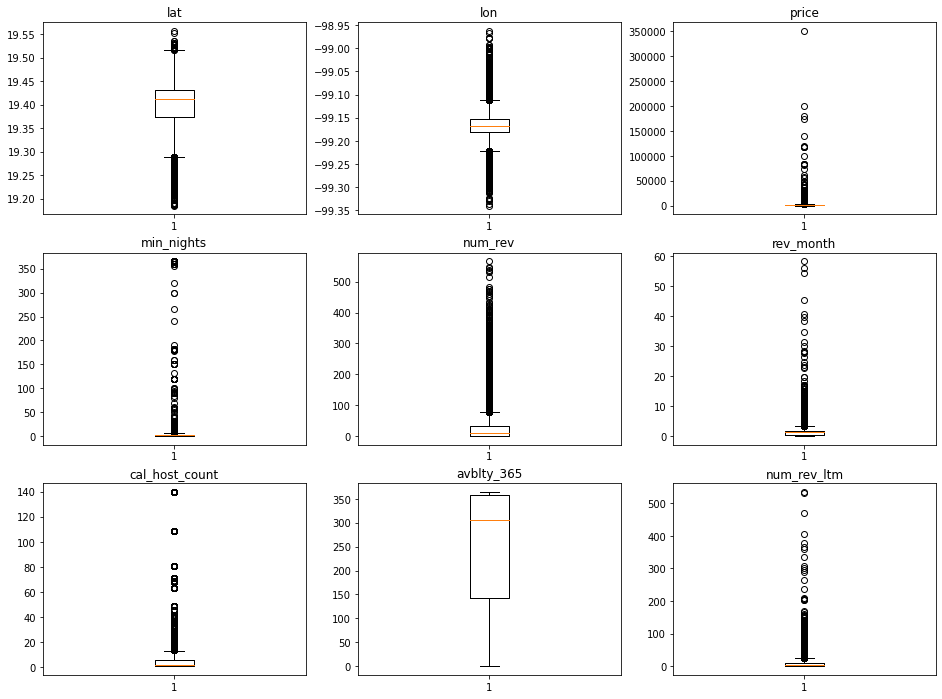

In [183]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

axs[0,0].boxplot(list_df[['latitude']])
axs[0,0].set_title('lat')
axs[0,1].boxplot(list_df[['longitude']])
axs[0,1].set_title('lon')
axs[0,2].boxplot(list_df[['price']])
axs[0,2].set_title('price')

axs[1,0].boxplot(list_df[['minimum_nights']])
axs[1,0].set_title('min_nights')
axs[1,1].boxplot(list_df[['number_of_reviews']])
axs[1,1].set_title('num_rev')
axs[1,2].boxplot(list_df[['reviews_per_month']])
axs[1,2].set_title('rev_month')

axs[2,0].boxplot(list_df[['calculated_host_listings_count']])
axs[2,0].set_title('cal_host_count')
axs[2,1].boxplot(list_df[['availability_365']])
axs[2,1].set_title('avblty_365')
axs[2,2].boxplot(list_df[['number_of_reviews_ltm']])
axs[2,2].set_title('num_rev_ltm')



We can see every column but avaiabiliy 365 have outliers, fortunately most of it follows a linear incremental pattern. For example, this is expected with latitude and longitude, since they are numeric variables that changes with distance. 

I will make some further examination into price and reviews column to eliminate those outliers

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

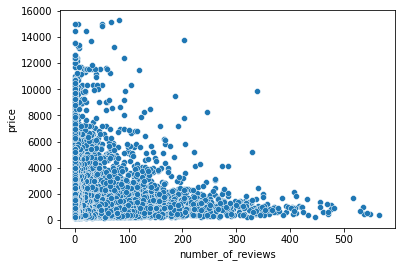

In [331]:
sns.scatterplot(data=(list_df),x= list_df['number_of_reviews'], y = list_df['price'])

In [118]:
list_df['price'].sort_values()

11994         0
11923         0
11975         0
11997         0
11995         0
          ...  
16647    139138
9426     174285
11087    180000
7860     200000
4614     350000
Name: price, Length: 19655, dtype: int64

In [140]:
len(list_df.loc[list_df['price'] < 5])

6

In [163]:
list_df.loc[list_df['price'] < 5]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11923,43096380,Flowsuites Condesa,318427756,Flowsuites Condesa,Cuauhtémoc,19.41090,-99.17229,Hotel room,0,1,0,2021-12-19,1.45399,1,0,0
11975,43205383,Emporio Ciudad de México,336118145,Hotel Emporio,Cuauhtémoc,19.43142,-99.15688,Hotel room,0,1,1,2021-02-21,0.10000,1,0,1
11993,43247503,FlowSuites Polanco,318447028,FlowSuites Polanco,Miguel Hidalgo,19.42918,-99.19296,Hotel room,0,1,0,2021-12-19,1.45399,1,0,0
11994,43247525,Krystal Grand Suites Insurgentes Ciudad De México,318980910,Krystal Grand Suites Insurgentes,Álvaro Obregón,19.35086,-99.18667,Hotel room,0,1,0,2021-12-19,1.45399,1,0,0
11995,43247567,CHAYA B&B,319050749,CHAYA B&B,Cuauhtémoc,19.43632,-99.14640,Hotel room,0,1,0,2021-12-19,1.45399,1,0,0
11997,43247660,Hotel Historico Central,319043090,Hotel Historico Central,Cuauhtémoc,19.43313,-99.13814,Hotel room,0,1,0,2021-12-19,1.45399,1,0,0


In [185]:
list_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

We can see there are 6 rows with a pricetag of 0 pesos per night, so i will find the average price per night for hotel rooms in order to input the value.

In [210]:
#Here for simplicity i will execute a SQL query 
# into the dataframe instead of the normal pandas query


print(ps.sqldf('SELECT AVG(price) FROM list_df WHERE room_type = "Hotel room";'))
print(ps.sqldf('SELECT AVG(price) FROM list_df WHERE room_type = "Private room";'))
print(ps.sqldf('SELECT AVG(price) FROM list_df WHERE room_type = "Shared room";'))

    AVG(price)
0  1664.265625
   AVG(price)
0  884.015323
   AVG(price)
0  833.186851


In [205]:
#This is how i would normally do with pandas notation


hot_rm_avg = int(list_df['price'].loc[list_df['room_type'] == 'Hotel room'].mean())

print(hot_rm_avg)

1664.265625


                       price
room_type                   
Entire home/apt  1789.764113
Hotel room       1664.265625
Private room      884.015323
Shared room       833.186851


<AxesSubplot:xlabel='room_type'>

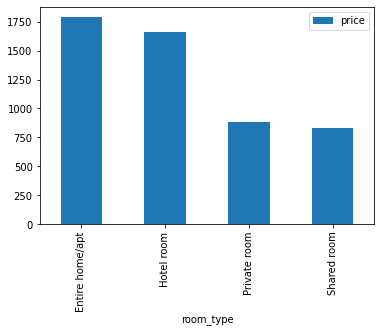

In [226]:
#Now for all room types and plotting the differences

print(list_df.filter(items=['price','room_type']).groupby(by=['room_type']).mean())
list_df.filter(items=['price','room_type']).groupby(by=['room_type']).mean().plot(kind='bar')

In [206]:
list_df['price'].mean()

1416.597405240397

Replacing the 0 values in price column by  the average of the hotel rooms

In [246]:
#here this cell is replacing al the prices of 0

list_df['price'].loc[list_df['price']== 0] = hot_rm_avg

/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([11923, 11975, 11993, 11994, 11995, 11997]),)

In [256]:
#corroborating the values have been replaced succesfuly
list_df.loc[list_df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


### Removing outliers
I will use the Z-score to detect and eliminate rows with outliers from columns price and minimum nigths, since number of reviews , reviews per month, host listings and number of reviews in the last month are subject of great variation.

In [273]:
#removing price outliers
list_df = list_df[(np.abs(stats.zscore(list_df['price'])) < 3)]

#removing minimum_nights outliers
list_df = list_df[(np.abs(stats.zscore(list_df['minimum_nights'])) < 3)]

#removing number_of_reviews outliers
#list_df = list_df[(np.abs(stats.zscore(list_df['number_of_reviews'])) < 3)]

#removing reviews_per_month outliers
#list_df = list_df[(np.abs(stats.zscore(list_df['reviews_per_month'])) < 3)]

#removing calculated_host_listings_count outliers
#list_df = list_df[(np.abs(stats.zscore(list_df['calculated_host_listings_count'])) < 3)]

#removing availability_365 outliers
list_df = list_df[(np.abs(stats.zscore(list_df['availability_365'])) < 3)]

#removing number_of_reviews_ltm outliers
#list_df = list_df[(np.abs(stats.zscore(list_df['number_of_reviews_ltm'])) < 3)]



In [275]:
list_df['minimum_nights'].sort_values()

0         1
11011     1
11013     1
11015     1
11016     1
         ..
15142    60
4828     60
11657    60
12552    60
8933     61
Name: minimum_nights, Length: 19408, dtype: int64

So we can see all the rows with a minimum night contract of 300, 250 or any big number per year were removed.

In [281]:
list_df.shape

(19408, 16)

After the outlier removal, around 250 rows were eliminated. Not a big number since at it's concept they where extreme values but in a low quantity compared to the overall dataset. The dataset it's still plentiful for further analysis and modeling.

### String date into Datetime conversion

It seems that last review date is saved as object (string) format, i will convert it into datetime format.

This changes wont be saved when exporting the table, every time the table it's loaded the transformation to date time should be done.

In [290]:
list_df['last_review']

0        2021-12-19
1        2021-08-23
2        2021-11-21
3        2021-12-13
4        2019-02-24
            ...    
19650    2021-12-24
19651    2021-12-19
19652    2021-12-19
19653    2021-12-19
19654    2021-12-19
Name: last_review, Length: 19408, dtype: object

In [294]:
list_df['last_review'] = pd.to_datetime(list_df['last_review'], format='%Y-%m-%d')

In [296]:
list_df['last_review']

0       2021-12-19
1       2021-08-23
2       2021-11-21
3       2021-12-13
4       2019-02-24
           ...    
19650   2021-12-24
19651   2021-12-19
19652   2021-12-19
19653   2021-12-19
19654   2021-12-19
Name: last_review, Length: 19408, dtype: datetime64[ns]

## Table save

At this point i will save the table with the preprocessing done so far. Further modifications will correspond eventually to the steps previews to create and apply a prediction model or more in depth data analysis.

In [297]:
list_df.to_csv('../raw_data/mexico/clean_listing.csv', index=False)

Now, i will corroborate that the table has been save properly and can be loaded.

In [299]:
pd.read_csv('../raw_data/mexico/clean_listing.csv').head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,2021-12-19,1.45399,1,363,0
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,0.41000,10,344,1
2,56074,Great space in historical San Rafael,265650,Maris,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,66,2021-11-21,0.50000,2,364,10


In [301]:
pd.read_csv('../raw_data/mexico/clean_listing.csv').dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

## Looking the correlations

I will check the correlation among the data.

In [303]:
cor_df = list_df.corr(method='pearson')

In [306]:
cor_df.style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.458007,0.057173,0.047007,0.032911,-0.036016,-0.384825,0.149289,0.152552,0.037314,0.012639
host_id,0.458007,1.000000,-0.026761,0.107314,-0.025104,-0.054928,-0.189409,0.093608,-0.032936,0.067590,0.004991
latitude,0.057173,-0.026761,1.000000,0.045629,0.108439,-0.015905,0.127563,0.131766,0.126023,-0.042278,0.125043
longitude,0.047007,0.107314,0.045629,1.000000,-0.141721,-0.039870,0.053483,0.069998,-0.039912,0.003065,0.050586
price,0.032911,-0.025104,0.108439,-0.141721,1.000000,-0.030044,0.005707,0.022857,0.170651,0.014160,0.015047
minimum_nights,-0.036016,-0.054928,-0.015905,-0.039870,-0.030044,1.000000,-0.097643,-0.097880,-0.034260,-0.018845,-0.119730
number_of_reviews,-0.384825,-0.189409,0.127563,0.053483,0.005707,-0.097643,1.000000,0.552470,0.047947,-0.023169,0.645745
reviews_per_month,0.149289,0.093608,0.131766,0.069998,0.022857,-0.097880,0.552470,1.000000,0.128380,0.045994,0.815333
calculated_host_listings_count,0.152552,-0.032936,0.126023,-0.039912,0.170651,-0.034260,0.047947,0.128380,1.000000,0.110483,0.141290
availability_365,0.037314,0.067590,-0.042278,0.003065,0.014160,-0.018845,-0.023169,0.045994,0.110483,1.000000,0.017941


We can't see any very apparent correlation, besides the ones from variables that are derivates from each other (ex. num of reviews and reviews per month), which is expected and will not be counted. 

So, maybe a mroe visual approach with variables that aren't related with each other will work better.

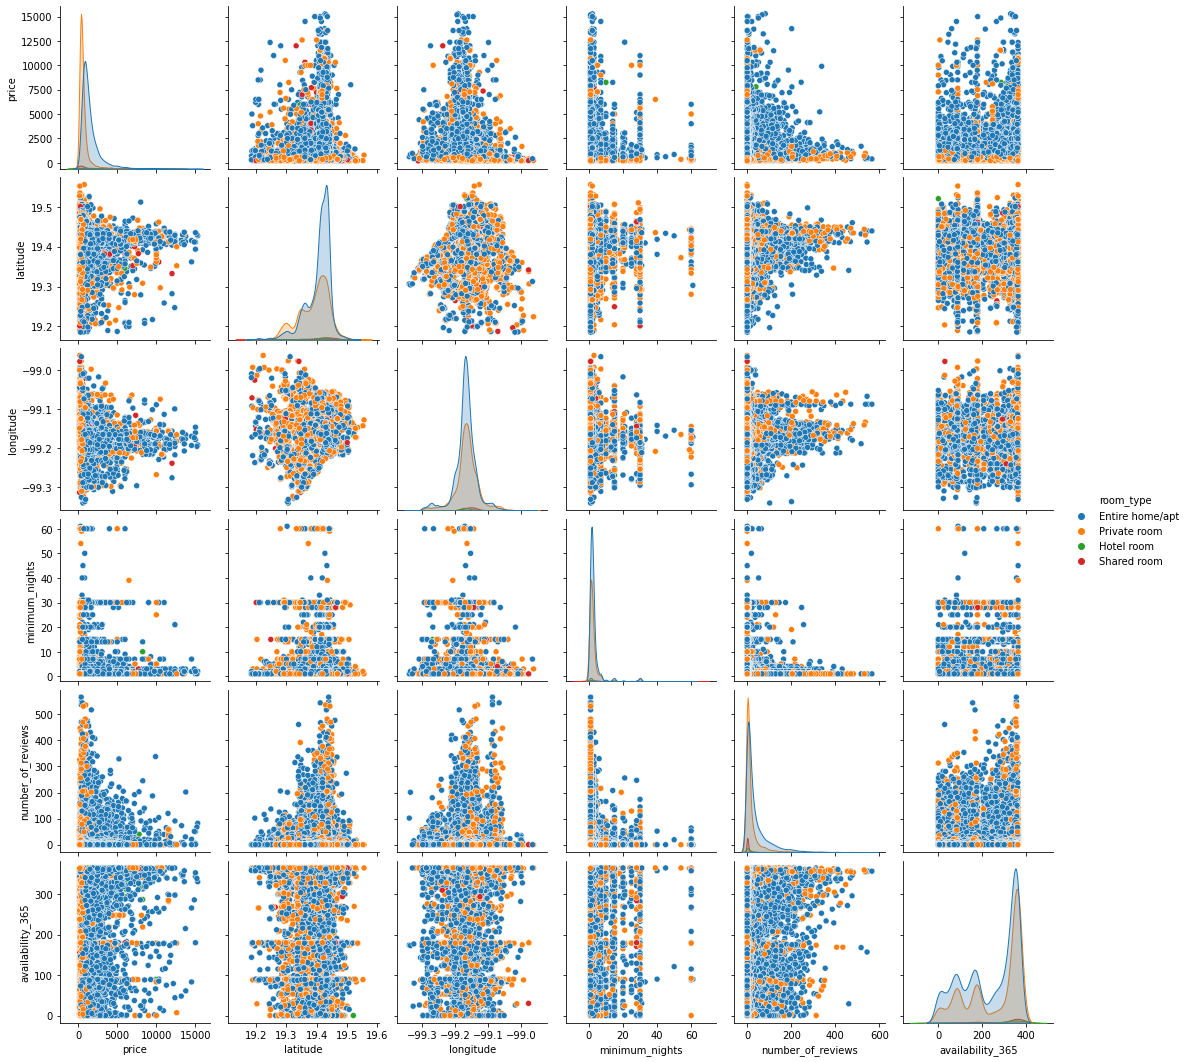

In [323]:
sns.pairplot(list_df.filter(items=['price', 'latitude', 'longitude', 'minimum_nights','number_of_reviews', 'availability_365','room_type']), hue='room_type', corner=False, kind='scatter')

We observe some interesting patterns. For example; 
* we can see the price is higher at the center of the latitude and longitude, this is the result of airbnb's being more expensive at the center of the city.

* The lower minimum nights tend to hold the higher price tag per night, while the more minimum nights become less expensive. This also can be explained by the usual practice on business where the client tend to be charged more when buying small quantities or less time, in the other hand when renting more time or buying wholesale price tend to go down. 

* We also see that, the more reviews an airbnb has, the less the price per night, this also makes sense and can be explained by the fact that the less expensive a room is, the more clientes it will attract, while the opposite is also true.

* For availability we don't see a clear patter when relating it with price

**Fun fact**

* The correlation between latitude and longitude draws the form of the CDMX, since they are coordinates.


**Further preprocessing will be made at the 02-preprocessing notebook**